# The Malthusian model

In this Model Project, we will analyse the Malthusian model which is a exponential growth model in a closed economy. The following equations define the Malthusian

The output function is an atypical Cobb-Douglas function where land and total factor productivity (technology) is constant and labor inputs grows with time:
$$Y_t = (AX)^{1-\alpha} \cdot L_t^\alpha$$
The output per worker:
$$y_t = \frac{Y_t}{L_t}$$

The change in labor is the difference between births and deaths:
$$L_{t+1} = n_t \cdot L_t + (1-\mu)L_t$$

The rate of which new babies are born is depended on income pr capita.
$$n_t = \eta \cdot y_t$$




Where t is the time, A is the (constant) technological level, X is the (constant) amount of land available, Y is the output, L is the population size, n is the number of children each capita will have at time t at the living standard y. $\eta$ is the influence of y on the birthrate and $\mu$ is the fraction of the population which dies every year.

In a more advanced model Malthusian model you can apply technological growth represented by having A increase over time by a factor g. This will not produce a steaty state value for labor but instead create a balanced growth path where population grows at a constant rate

Nessesary imports:

In [1]:
# In this part we make all the neccesary imports of including our python file MalthusModel which includes our model
import numpy as np
from scipy.optimize import fsolve
import sympy as sm
import ipywidgets as widgets
import MalthusModel

# Here we define our model from our other files as model_cobb
model_cobb = MalthusModel.Malthus_cobbd()
model_ext = MalthusModel.Malthus_ext()

#### Analytical solution

First, we will find the steady state analytically, by setting up and solving the steady state condition.

In [2]:
# Here we define symbolic variables
A, X, eta, alpha, L_t, mu, L, Y, y = sm.symbols('A X eta alpha L_t mu L^* Y^* y^*') #Defining  our variables as mathmatic symbols

# Now we define the equations for output, fertility, labour growth and output pr labor.
def Yt(A, X, alpha, L_t):
    return ((A * X)**(1 - alpha)) * (L_t)**alpha #Output Y is defined

def nt(eta, L_t, A, X, alpha): 
    return eta * (Yt(A, X, alpha, L_t) / L_t) #Population growth n defined  

def Lt1(L_t, mu, A, X, alpha):
    return nt(eta, L_t, A, X, alpha) * L_t + (1 - mu) * L_t #labor/population size/developement L defined

def yt(A, X, alpha, L_t): 
    return Yt(A, X, alpha, L_t) / L_t #output per labor defined

# We now efine the condition to solve
condition = sm.Eq(L_t, Lt1(L_t, mu, A, X, alpha)) #condition for L_t=L_t+1=L is set

# We solve the equation for L_t
solve = sm.solve(condition, L_t) #The steady state condition is solved (L is isolated)
L_ss =solve[0]
# Here we print the solution
print("The steady state value for labor can be found from")
display(sm.Eq(L,L_ss))


Y_ss = ((A * X)**(1 - alpha)) * (L_ss)**alpha #the steady state of Y is defined (Y(L))
print("The steady state value for output can be found from")
display(sm.Eq(Y,Y_ss))

The steady state value for labor can be found from


Eq(L^*, (eta*(A*X)**(1 - alpha)/mu)**(-1/(alpha - 1)))

The steady state value for output can be found from


Eq(Y^*, (A*X)**(1 - alpha)*((eta*(A*X)**(1 - alpha)/mu)**(-1/(alpha - 1)))**alpha)

Now we can find the steady state values:

In [3]:
# Here we find the steady state values for labor and output. This is done with sumpy which is not allowed. In the next section we solve numerically.
ss_L = sm.lambdify((eta, A, X, alpha, mu), L_ss, 'numpy') # we use sm.lambdify to turn the found ss conditions into callable functions
ss_Y = sm.lambdify((eta, A, X, alpha, mu), Y_ss, 'numpy')

In [4]:
# We print the solutions
print("The analytical steady state for the population is ", ss_L(0.4, model_cobb.par.A, model_cobb.par.X, model_cobb.par.alpha, model_cobb.par.mu)) #we print the results for the steady state values using set parameter values from out .py file
print("The analytical steady state for the output is ", ss_Y(0.4, model_cobb.par.A, model_cobb.par.X, model_cobb.par.alpha, model_cobb.par.mu))
print("The analytical output per capita is ", yt(model_cobb.par.A, model_cobb.par.X, model_cobb.par.alpha, ss_L(0.4, model_cobb.par.A, model_cobb.par.X, model_cobb.par.alpha, model_cobb.par.mu)))

The analytical steady state for the population is  15481.909861108199
The analytical steady state for the output is  3870.4774652770493
The analytical output per capita is  0.24999999999999997


#### Numerical analysis

Here we use fsolve from scipy.opimize to estimate the steady state values:

In [5]:
# We estime eta and make a starting guess for L. We use the value of the danish population of 5.6 million people.
eta_estimate = 0.4
L_guess = 5600000 

# Use initial guess and find steady state values:
initial_guess = [L_guess, model_cobb.Yt(L_guess)]

SS_values = fsolve(model_cobb.ss_conditions, initial_guess, args=(eta_estimate))

L_SS_value, Y_SS_value = SS_values

#print(SS_values)
print('The steady state value for the output Y is ', model_cobb.Yt(L_SS_value))
print('The steady state value for the population L is ', model_cobb.Lt1(L_SS_value, eta_estimate))
print('The steady state for output per capita is ', model_cobb.yt(L_SS_value) )

The steady state value for the output Y is  3870.477465277056
The steady state value for the population L is  15481.909861108232
The steady state for output per capita is  0.2499999999999999


From this we can see, what we have achieved almost identical results for the steady state level of this malthusian model, by doing analytical and numerical analysis.

### Plotting results

We now wish to see how this works over time. By setting an initial population, we can graph the population size and the output over time

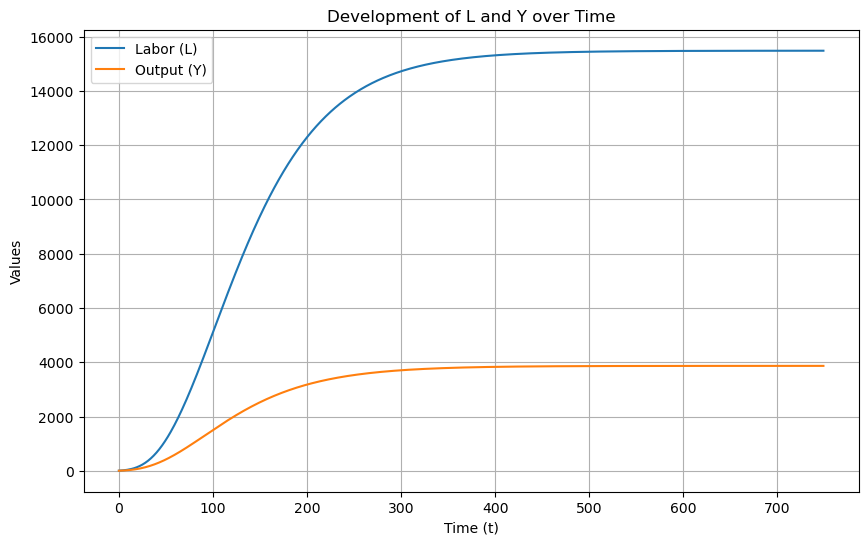

In [6]:
# Import to show graph
import matplotlib.pyplot as plt
initial_L = 10  # Initial value of L
num_periods = 750  # Number of time periods to simulate

# We use arrays to store values over time
L_values = np.zeros(num_periods)
Y_values = np.zeros(num_periods)

# We initialize the first value like before
L_values[0] = initial_L
Y_values[0] = model_cobb.Yt(L_values[0])

# Simulate the system over time
for t in range(1, num_periods):
    Y_t = Y_values[t - 1]
    L_t = L_values[t - 1]
    
    # Calculate n_t
    n_t = model_cobb.nt(eta, L_t)
    
    # Calculate L_{t+1}
    L_next = model_cobb.Lt1(L_t, eta_estimate)
    
    # Update arrays
    L_values[t] = L_next
    Y_values[t] = model_cobb.Yt(L_next)

# Plotting the results in the plot
time_periods = np.arange(num_periods)

plt.figure(figsize=(10, 6))
plt.plot(time_periods, L_values, label='Labor (L)')
plt.plot(time_periods, Y_values, label='Output (Y)')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Development of L and Y over Time')
plt.legend()
plt.grid(True)
plt.show()

Now we want to add sliders to the graphs so we can see how the evolution of labor and output changes with changes in parameters

In [7]:
def plot_graph(A, X, mu, eta_estimate, alpha):
    model_cobb.par.A = A
    model_cobb.par.X = X
    model_cobb.par.mu = mu
    model_cobb.par.alpha = alpha
    
    
    initial_L = 10  # Initial value of L
    num_periods = 750  # Number of time periods to simulate

    # Arrays to store values over time
    L_values = np.zeros(num_periods)
    Y_values = np.zeros(num_periods)

    # Initialize the first value
    L_values[0] = initial_L
    Y_values[0] = model_cobb.Yt(L_values[0])

    # Simulate the system over time
    for t in range(1, num_periods):
        Y_t = Y_values[t - 1]
        L_t = L_values[t - 1]

        # Calculate n_t
        n_t = model_cobb.nt(eta, L_t)

        # Calculate L_{t+1}
        L_next = model_cobb.Lt1(L_t, eta_estimate)

        # Update arrays
        L_values[t] = L_next
        Y_values[t] = model_cobb.Yt(L_next)

    # Plotting the results in the sliding plot
    time_periods = np.arange(num_periods)

    plt.figure(figsize=(10, 6))
    plt.plot(time_periods, L_values, label='Labor (L)')
    plt.plot(time_periods, Y_values, label='Output (Y)')
    plt.xlabel('Time (t)')
    plt.ylabel('Values')
    plt.title('Development of L and Y over Time')
    plt.legend()
    plt.grid(True)
    plt.show()

# We create sliders for the parameters
A_slider = widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1.5, description='A:')
X_slider = widgets.FloatSlider(min=0.1, max=2, step=0.1, value=1, description='X:')
mu_slider = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.1, description='Mu:')
eta_slider = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.4, description='Eta:')
alpha_slider = widgets.FloatSlider(min=0, max=1, step=0.1, value=0.8, description='Alpha:')


# Finally we create the interactive plot
widgets.interact(plot_graph, A=A_slider, X=X_slider, mu=mu_slider, eta_estimate=eta_slider, alpha=alpha_slider);

interactive(children=(FloatSlider(value=1.5, description='A:', max=2.0, min=0.1), FloatSlider(value=1.0, descr…

# The Malthusian model Extension

In this extension of the model, we will analyse the Malthusian model which is a exponential growth model in a closed economy. The following equations define the Malthusian included growth in the technological level A:

The output function is an atypical Cobb-Douglas function where land and total factor productivity (technology) is constant and labor inputs grows with time:
$$Y_t = (At*X)^{1-\alpha} \cdot L_t^\alpha$$
The output per worker:
$$y_t = \frac{Y_t}{L_t}$$

The change in labor is the difference between births and deaths:
$$L_{t+1} = n_t \cdot L_t + (1-\mu)L_t$$

The rate of which new babies are born is depended on income pr capita.
$$n_t = \eta \cdot y_t$$

The technological level:
$$A_t = A_0 \cdot L_t ^{-\beta}$$




Where t is the time, A is the technological level, X is the (constant) amount of land available, Y is the output, L is the population size, n is the number of children each capita will have at time t at the living standard y. $\eta$ is the influence of y on the birthrate and $\mu$ is the fraction of the population which dies every year.

#### Numerical solution

Here we use fsolve from scipy.opimize to estimate the steady state values:

In [11]:
# We estime eta and make a starting guess for L. We use the value of the danish population of 5.6 million people.
eta_estimate_ex = 0.4
L_guess_ex = 5600000

# Use initial guess and find steady state values:
initial_guess_ex = [L_guess_ex, model_ext.Yt(L_guess_ex)]

SS_values_ex = fsolve(model_ext.ss_conditions, initial_guess_ex, args=(eta_estimate_ex))

L_SS_value_ex, Y_SS_value_ex = SS_values_ex

#print(SS_values)
print('The steady state value for the population L is ', model_ext.Lt1(L_SS_value_ex, eta_estimate_ex))
print('The steady state value for the output Y is ', model_ext.Yt(L_SS_value_ex))
print('The steady state for output per capita is ', model_ext.yt(L_SS_value_ex) )

The steady state value for the population L is  9418.751571041865
The steady state value for the output Y is  2354.6878927604666
The steady state for output per capita is  0.25000000000000006


#### Simulation and plot

Lastly, we simulate the new Malthus Model over time, and we plot the simulation, to see if our numerical solution holds.

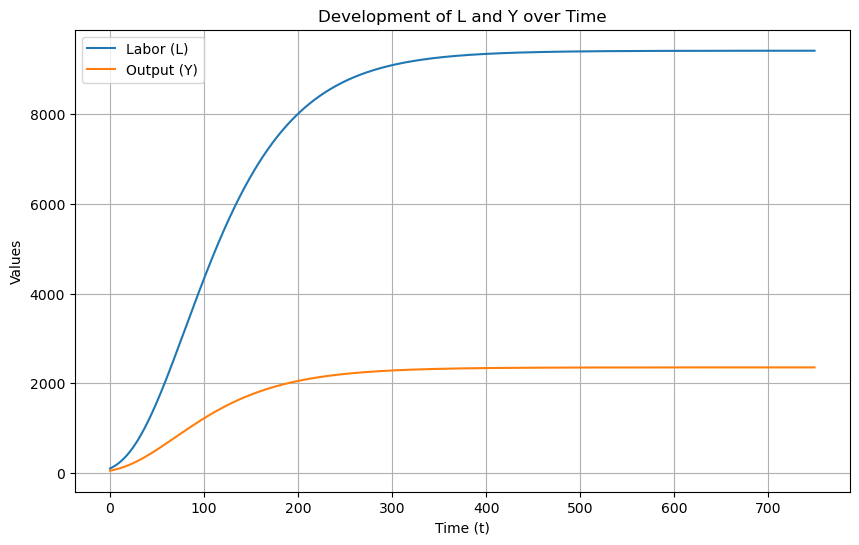

In [15]:
initial_L_ex = 100  # Initial value of L
num_periods_ex = 750  # Number of time periods to simulate

# We use arrays to store values over time
L_values_ex = np.zeros(num_periods_ex)
Y_values_ex = np.zeros(num_periods_ex)

# We initialize the first value like before
L_values_ex[0] = initial_L_ex
Y_values_ex[0] = model_ext.Yt(L_values_ex[0])

# Simulate the system over time
for t in range(1, num_periods_ex):
    Y_t = Y_values_ex[t - 1]
    L_t = L_values_ex[t - 1]
    
    # Calculate n_t
    n_t = model_ext.nt(eta, L_t)
    
    # Calculate L_{t+1}
    L_next_ex = model_ext.Lt1(L_t, eta_estimate)
    
    # Update arrays
    L_values_ex[t] = L_next_ex
    Y_values_ex[t] = model_ext.Yt(L_next_ex)

# Plotting the results in the plot
time_periods_ex = np.arange(num_periods_ex)

plt.figure(figsize=(10, 6))
plt.plot(time_periods_ex, L_values_ex, label='Labor (L)')
plt.plot(time_periods_ex, Y_values_ex, label='Output (Y)')
plt.xlabel('Time (t)')
plt.ylabel('Values')
plt.title('Development of L and Y over Time')
plt.legend()
plt.grid(True)
plt.show()

From above plot, we see that the labor L converges towards 9418 and the output Y convergers towards 2354 and we can say that our numericla solution to the extended Malthus Model holds.